In [6]:
import numpy as np
import pandas as pd

In [7]:
fn = "analysis/results.csv"
df = pd.read_csv(fn)
df["dataset_name"] = df["source"] + "_" + df["target"]
df.head()

,source,target,percent-heldout,seed,transfer,raw,target_only,dataset_name
0,REP,GDSC,20,0,0.810710,0.501466,0.806638,REP_GDSC
1,REP,GDSC,20,1,0.818809,0.521551,0.817445,REP_GDSC
2,REP,GDSC,20,2,0.812328,0.513712,0.804020,REP_GDSC
3,REP,GDSC,20,3,0.827824,0.503190,0.815933,REP_GDSC
4,REP,GDSC,20,4,0.829023,0.508852,0.808236,REP_GDSC


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

In [4]:
## Generate some data
np.random.seed(100)

dataset_names = ["Dataset " + str(i) for i in range(1,4)]
results = []
for dataset in dataset_names:
    mu = 0.0
    slope = np.random.uniform(1.0, 4.0)
    for t in range(8):
        for _ in range(25):
            results.append({"Dataset":dataset, "Round":t, "Value":(mu + np.random.normal(0.0, 0.5))})
        mu += slope*np.random.uniform(0.1, 0.4)
df = pd.DataFrame(results)

<Figure size 640x480 with 0 Axes>

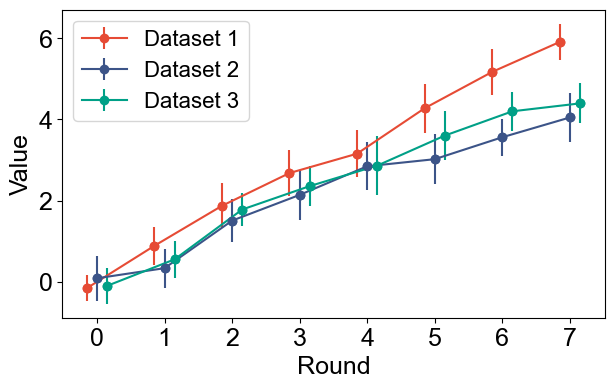

In [5]:
plt.rcParams.update({"font.size":18}) ## Set fontsize

plt.clf()
fig, ax = plt.subplots(figsize=(7,4))
std_df = df.groupby(["Round", "Dataset"]).std().reset_index()
mean_df = df.groupby(["Round", "Dataset"]).mean().reset_index()

offset = 0.15
for i, dataset in enumerate(dataset_names):
    submean_df = mean_df[(mean_df["Dataset"]==dataset)]
    substd_df = std_df[(std_df["Dataset"]==dataset)]
    
    plt.errorbar(x=(submean_df["Round"] + (i-1)*offset ), y=submean_df["Value"], yerr=substd_df["Value"], color=colors[i], fmt='-o', label=dataset, zorder=0)
    plt.scatter(x=(submean_df["Round"] + (i-1)*offset ), y=submean_df["Value"], color=colors[i], zorder=2)

plt.legend(fontsize=16)
plt.xticks(np.arange(8))
plt.xlabel("Round")
plt.ylabel("Value")
plt.show()